In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [41]:
# Reading the data from CSV
file_path = '/content/Boston_Housing_Data.csv'
df = pd.read_csv(file_path)

In [42]:
# Exploring the data
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [43]:
# Handling missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)

In [44]:
# Assuming the target variable (MEDV) is the last column
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

In [45]:
# Standardizing the original features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
# Training and evaluating model on original features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 25.017672023842852
R^2 Score: 0.658852019550812


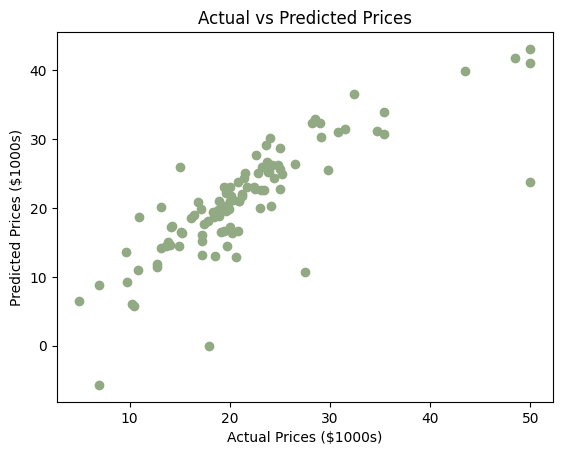

In [66]:
plt.scatter(y_test, y_pred, color='#92AA83')
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted Prices")
plt.show()

In [49]:
# Generating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [50]:
# Generating interaction features
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = interaction.fit_transform(X)

In [51]:
X_log = np.log1p(X)  # Logarithm transformation (adding 1 to avoid log(0))

In [52]:
X_sqrt = np.sqrt(X)  # Square root transformation

In [53]:
# Standardizing transformed features
scaler = StandardScaler()
X_scaled_log = scaler.fit_transform(X_log)
X_scaled_sqrt = scaler.fit_transform(X_sqrt)

In [54]:
# Training and evaluating model on transformed features
model.fit(X_train, y_train)  # Reusing X_train, X_test from before
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Original Features:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Original Features:
Mean Squared Error: 25.017672023842852
R^2 Score: 0.658852019550812


In [55]:
# Training and evaluating model on interaction features
X_train_interaction, X_test_interaction, _, _ = train_test_split(X_interaction, y, test_size=0.2, random_state=42)
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train)
y_pred_interaction = model_interaction.predict(X_test_interaction)
mse_interaction = mean_squared_error(y_test, y_pred_interaction)
r2_interaction = r2_score(y_test, y_pred_interaction)
print("Interaction Features:")
print(f"Mean Squared Error: {mse_interaction}")
print(f"R^2 Score: {r2_interaction}")

Interaction Features:
Mean Squared Error: 13.942475247036676
R^2 Score: 0.8098765037587722


In [56]:
# Training and evaluating model on polynomial features
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Features:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R^2 Score: {r2_poly}")

Polynomial Features:
Mean Squared Error: 17.435995944176362
R^2 Score: 0.7622378773769569


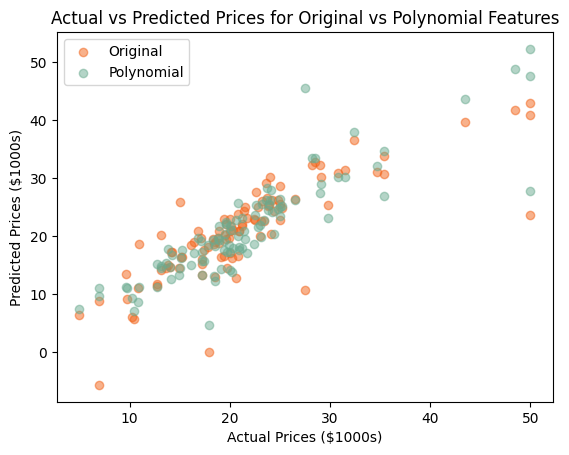

In [63]:
# Visualizing results for original vs polynomial features
plt.scatter(y_test, y_pred, color='#F26419', alpha=0.5, label='Original')
plt.scatter(y_test, y_pred_poly, color='#6BAB90', alpha=0.5, label='Polynomial')
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted Prices for Original vs Polynomial Features")
plt.legend()
plt.show()